# **ISTA 322 FINAL PROJECT**

**Project Title:** Understanding the effectiveness of vaccinations and booster shots against COVID 19 in the year 2021







**Student Info:**


*   **Name:** Sarayu Gadi
*   **Class:** ISTA 322 (Fall 2024)
* **Year:** Sophomore
* **Institution:** University of Arizona

### **Project Overview**

### **Objective:**

The goal of this project is to create a complete data engineering pipeline that takes real-world data, transforms it, and loads it onto a SQL database to be analyzed.

Here, we take census information about COVID-19 and vaccinations administered and try to understand how effective the medication was.

### **Purpose:**

The goal of this project is to create a complete data engineering pipeline that takes real-world data, transforms it, and loads it onto a SQL database to be analyzed.

Here, we take census information about COVID-19 and vaccinations administered and try to understand how effective the medication was.

### **Usage:**

In this project, we focus on gathering important information about COVID-19 and the vaccinations that have been given. We want to find out how effective these vaccines are in preventing severe illness and death from the virus. By looking at census data, we can understand the impact of vaccination on different populations.

Ultimately, this project aims to provide insights into how well the vaccines are working. We hope to show patterns and trends in the data that can help inform public health decisions and improve our understanding of vaccination effectiveness during the COVID-19 pandemic.

### **Process:**

1. **Extract:** In this first step, we gather data from public health databases, government sites, and other reliable sources that track COVID-19 cases and vaccination rates.

2. **Tranform:** This involves checking for errors like missing values or incorrect formats and standardizing everything into a uniform format for easier processing. We might also create new variables, such as calculating death percentages or vaccination rates, to gain deeper insights. This step is important since the quality and format of the data directly affect how accurate our analysis will be.

3. **Load:** Once the data is transformed, we load it into a SQL database. This step organizes the data into tables, like those for COVID-19 cases, deaths, vaccination data, and demographics, making it easy to access for analysis. With the data in place, we can use SQL queries to explore and analyze it, allowing us to draw meaningful conclusions about the effectiveness of vaccinations against COVID-19.

## **PART I: EXTRACTING DATA**

In [1]:
# import modules
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the raw data and create data frames
covid_cases_deaths_raw = pd.read_csv('https://docs.google.com/spreadsheets/d/15HanhCVuvd1iWD7i3KOK3LCKHO_FPGfF_LUuQByE-yA/gviz/tq?tqx=out:csv')
vaccinations_raw = pd.read_csv("https://docs.google.com/spreadsheets/d/19kcLDCie0fnuM1wA5pjA0Mt6r91ggW8loZqdSsNJb4w/gviz/tq?tqx=out:csv")

In [3]:
# Let's look at the raw tables to understand what we're dealing with

print(covid_cases_deaths_raw.head())
print(vaccinations_raw.head())

  Date_reported Country_code     Country WHO_region  New_cases  \
0    2020-01-04           AI    Anguilla        AMR        NaN   
1    2020-01-04           AZ  Azerbaijan        EUR        NaN   
2    2020-01-04           BB    Barbados        AMR        NaN   
3    2020-01-04           BR      Brazil        AMR        NaN   
4    2020-01-04           BD  Bangladesh       SEAR        0.0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0  
4                 0         0.0                  0  
        Entity Code         Day  COVID-19 doses (cumulative, per hundred)  \
0  Afghanistan  AFG  2021-02-22                                  0.000000   
1  Afghanistan  AFG  2021-02-28                                  0.020208   
2  Afghanistan  AFG  2021-03-16                       

## **PART II: TRANSFORMING THE DATA**

### **2.1. Filtering and Standardizing the Data:**

In [4]:
# We want to analyze only the 2021 data. So we will drop the data for all other years

covid_cases_deaths_2021 = covid_cases_deaths_raw[covid_cases_deaths_raw['Date_reported'].str.contains('2021')]
vaccinations_2021 = vaccinations_raw[vaccinations_raw['Day'].str.contains('2021')]

In [5]:
# Let's check our new tables to make sure the data is in the date range we need

print(covid_cases_deaths_2021)
print(vaccinations_2021)

       Date_reported Country_code              Country WHO_region  New_cases  \
87120     2021-01-01           UA              Ukraine        EUR        NaN   
87121     2021-01-01           TT  Trinidad and Tobago        AMR        NaN   
87122     2021-01-01           MX               Mexico        AMR    14728.0   
87123     2021-01-01           YE                Yemen        EMR        2.0   
87124     2021-01-01           UY              Uruguay        AMR      518.0   
...              ...          ...                  ...        ...        ...   
174715    2021-12-31           BB             Barbados        AMR      247.0   
174716    2021-12-31           BD           Bangladesh       SEAR      512.0   
174717    2021-12-31           AI             Anguilla        AMR        NaN   
174718    2021-12-31           AZ           Azerbaijan        EUR      510.0   
174719    2021-12-31           CA               Canada        AMR    32120.0   

        Cumulative_cases  New_deaths  C

Transform:




In [6]:
# Let's start with the covid table first since this is our primary table

# We want to get a feel for the data and also want to check for any values that may skew our analysis

print(covid_cases_deaths_2021.describe())

# Here, we're only concerned about the total cases and total deaths. So we don't need the columns New_cases and New_deaths. We can drop those

covid_cases_deaths_2021_new = covid_cases_deaths_2021.drop(columns=['New_cases', 'New_deaths'])

print(covid_cases_deaths_2021_new.describe())


           New_cases  Cumulative_cases    New_deaths  Cumulative_deaths
count   66230.000000      8.760000e+04  66595.000000       87600.000000
mean     3066.755881      7.606591e+05     53.117471       16280.011963
std     15413.494124      3.279549e+06    243.476985       62594.770054
min      -875.000000      0.000000e+00     -6.000000           0.000000
25%        13.000000      3.758750e+03      0.000000          37.000000
50%       155.000000      3.857400e+04      2.000000         599.000000
75%      1130.000000      3.402508e+05     16.000000        5697.000000
max    519740.000000      5.353429e+07   8786.000000      819055.000000
       Cumulative_cases  Cumulative_deaths
count      8.760000e+04       87600.000000
mean       7.606591e+05       16280.011963
std        3.279549e+06       62594.770054
min        0.000000e+00           0.000000
25%        3.758750e+03          37.000000
50%        3.857400e+04         599.000000
75%        3.402508e+05        5697.000000
max     

In [7]:
# So overall, the data seems to be fine. But just to double-check, let's make sure there are no NAN values in the Cumulative_cases and Cumulative_deaths columns

covid_cases_deaths_2021_new.isna().sum()

# Luckily, the cases and deaths columns do not have NAN values, which is a good sign. This means that we aren't intentionally skewing the data. The data we downloaded may have been biased but
# we can at least be sure that our ETL is not messing with the data.

,0
Date_reported,0
Country_code,365
Country,0
WHO_region,0
Cumulative_cases,0
Cumulative_deaths,0


In [8]:
# Let's now address the NAN values from the Country_code column

# Filter the DataFrame to get only the rows with NaN values
nan_rows = covid_cases_deaths_2021_new[covid_cases_deaths_2021_new.isna().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)

       Date_reported Country_code  Country WHO_region  Cumulative_cases  \
87160     2021-01-01          NaN  Namibia        AFR             24536   
87560     2021-01-02          NaN  Namibia        AFR             24536   
87641     2021-01-03          NaN  Namibia        AFR             25107   
88035     2021-01-04          NaN  Namibia        AFR             25377   
88122     2021-01-05          NaN  Namibia        AFR             25878   
...              ...          ...      ...        ...               ...   
173564    2021-12-27          NaN  Namibia        AFR            146459   
173959    2021-12-28          NaN  Namibia        AFR            146720   
174040    2021-12-29          NaN  Namibia        AFR            147469   
174439    2021-12-30          NaN  Namibia        AFR            147974   
174525    2021-12-31          NaN  Namibia        AFR            148839   

        Cumulative_deaths  
87160                 208  
87560                 209  
87641          

In [9]:
# Now let's see if all the NAN values are for one single country or multiple countries
unique_countries_with_nan = nan_rows['Country'].unique()

# Print the unique country names
print("Unique countries with NaN values in any column:")
print(unique_countries_with_nan)

# So we see that only the country "Namibia" has no country code. For the sake of the ETL process, let's make up a country code and assign it to this country.
# Assign the country code "NAM" to all rows with the country name "Namibia"
covid_cases_deaths_2021_new.loc[covid_cases_deaths_2021_new['Country'] == 'Namibia', 'Country_code'] = 'NAM'

# Print the updated DataFrame
print(covid_cases_deaths_2021_new.isna().sum())

Unique countries with NaN values in any column:
['Namibia']
Date_reported        0
Country_code         0
Country              0
WHO_region           0
Cumulative_cases     0
Cumulative_deaths    0
dtype: int64


In [10]:
# Now that all of our NAN values are taken care of, let's turn to the datatypes

print(covid_cases_deaths_2021_new.dtypes)

# We want to make sure that all the datatypes are appropriate so it can make our querying easier

# Converting 'Date_reported' to datetime
covid_cases_deaths_2021_new['Date_reported'] = pd.to_datetime(covid_cases_deaths_2021_new['Date_reported'], errors='coerce')

print(covid_cases_deaths_2021_new.dtypes)

Date_reported        object
Country_code         object
Country              object
WHO_region           object
Cumulative_cases      int64
Cumulative_deaths     int64
dtype: object
Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
Cumulative_cases              int64
Cumulative_deaths             int64
dtype: object


In [11]:
# Perfect! So our covid_cases_deaths_2021_new table is in good shape!

# Now let's work on the vaccinations_2021 table

# We only want people fully vaccinated. So we will take the data that tells us how many people were completely vaccinated and we leave in the booster shot data too to give us some extra info about
# how it may have impacted the treatment of the disease

vaccinations_2021_new = vaccinations_2021.drop(columns=['People vaccinated (cumulative, per hundred)', 'COVID-19 doses (cumulative, per hundred)'])

# Optionally, print the updated DataFrame or its columns to verify the change
vaccinations_2021_new


,Entity,Code,Day,"People fully vaccinated (cumulative, per hundred)","Booster doses (cumulative, per hundred)"
0,Afghanistan,AFG,2021-02-22,NaN,NaN
1,Afghanistan,AFG,2021-02-28,NaN,NaN
2,Afghanistan,AFG,2021-03-16,NaN,NaN
3,Afghanistan,AFG,2021-04-07,NaN,NaN
4,Afghanistan,AFG,2021-04-22,NaN,NaN
...,...,...,...,...,...
84151,Zimbabwe,ZWE,2021-12-26,19.362375,0.000000
84152,Zimbabwe,ZWE,2021-12-27,19.373516,0.024538
84153,Zimbabwe,ZWE,2021-12-28,19.386261,0.024849
84154,Zimbabwe,ZWE,2021-12-29,19.427246,0.028913


In [12]:
# Time to tackle the NAN values for this table

# The process is the same as the one for the covid table. We take on the columns one-by-one to make sure we aren't deleting relevant information

print(vaccinations_2021_new.isna().sum())

Entity                                                   0
Code                                                  4015
Day                                                      0
People fully vaccinated (cumulative, per hundred)     4178
Booster doses (cumulative, per hundred)              19418
dtype: int64


In [13]:
# Now, there is no way for us to tell what the replacement for the NAN values for People fully vaccinated and Booster doses could be. But the most reasonable value would be 0 (assuming the worst case scenario)
# I say worst-case scenario because it's better to underestimate the effectiveness of the vaccines as compared to overestimating it for logical reasons. There can be room for improvement if the data is underestimated
# but overestimating in these cases can lead to a reduce in effort to improve healthcare.

# So let's replace the NAN values of these columns with 0

# Replacing NaNs with 0 directly using .loc
vaccinations_2021_new.loc[
    vaccinations_2021_new['People fully vaccinated (cumulative, per hundred)'].isna(),
    'People fully vaccinated (cumulative, per hundred)'
] = 0

vaccinations_2021_new.loc[
    vaccinations_2021_new['Booster doses (cumulative, per hundred)'].isna(),
    'Booster doses (cumulative, per hundred)'
] = 0

print(vaccinations_2021_new.isna().sum())

Entity                                                  0
Code                                                 4015
Day                                                     0
People fully vaccinated (cumulative, per hundred)       0
Booster doses (cumulative, per hundred)                 0
dtype: int64


In [14]:
# We see that some of the countries have missing values for country codes too. Let's see what that's about

# Filter rows with NaN values
nan_rows = vaccinations_2021_new[vaccinations_2021_new.isna().any(axis=1)]

# Get unique country names from the rows with NaN values
unique_nan_countries = nan_rows['Entity'].unique()

# Print the unique country names
print(unique_nan_countries)

['Africa' 'Asia' 'Europe' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries' 'North America'
 'Oceania' 'South America' 'Upper-middle-income countries']


In [15]:
# We are working with individual countries only so we can drop the countries grouped based on income

values_to_drop = ["High-income countries", 'Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries']  # Replace with the actual values you want to drop

# Drop rows where 'Country' column matches any of the specified values
vaccinations_2021_new = vaccinations_2021_new[~vaccinations_2021_new['Entity'].isin(values_to_drop)]

nan_rows = vaccinations_2021_new[vaccinations_2021_new.isna().any(axis=1)]

# Get unique country names from the rows with NaN values
unique_nan_countries = nan_rows['Entity'].unique()

# Print the unique country names remaining that have NAN values
print(unique_nan_countries)

['Africa' 'Asia' 'Europe' 'European Union (27)' 'North America' 'Oceania'
 'South America']


In [16]:
# Now, we can see that our data is flawed. By this, I mean that the vaccination count is given per continent even though the count per country in the continent is given
# If you go through the data for the continents remaining in the list, you see that the counts for individual counties are already given
# For example, India is a country in Asia and India has its own vaccination dosage count. But we see a cumulative dosage count for Asia which is unnecessary
# So we can just drop entities with these names

# Specify the list of continent names to drop
continents_to_drop = ['Africa', 'Asia' ,'Europe' ,'European Union (27)', 'North America' ,'Oceania', 'South America']  # Add any additional continent names if needed

# Drop rows where 'Country' column matches any of the specified continent names
vaccinations_2021_new = vaccinations_2021_new[~vaccinations_2021_new['Entity'].isin(continents_to_drop)]

nan_rows = vaccinations_2021_new[vaccinations_2021_new.isna().any(axis=1)]

# Get unique country names from the rows with NaN values
unique_nan_countries = nan_rows['Entity'].unique()

print(vaccinations_2021_new.isna().sum())


Entity                                               0
Code                                                 0
Day                                                  0
People fully vaccinated (cumulative, per hundred)    0
Booster doses (cumulative, per hundred)              0
dtype: int64


In [17]:
# Our problems with the NAN values are done! We move on now

# Let's change datatypes and column names to appropriate ones in the vaccinations table

# First let's tackle the column names
print(vaccinations_2021_new.columns)

# Rename specific columns
vaccinations_2021_new = vaccinations_2021_new.rename(columns={
    'Entity': 'Country',
    'Code': 'Country_code',
    'Day': 'Date_reported',
    'People fully vaccinated (cumulative, per hundred)': 'People_fully_vaccinated',
    'Booster doses (cumulative, per hundred)': 'Booster_doses'
})

# Print the updated DataFrame's columns
print(vaccinations_2021_new.columns)

#Next, we take on the data types
# Changing the data types
print(vaccinations_2021_new.dtypes)

# Convert the 'Date_reported' column to datetime
vaccinations_2021_new['Date_reported'] = pd.to_datetime(vaccinations_2021_new['Date_reported'])

print(vaccinations_2021_new.dtypes)

Index(['Entity', 'Code', 'Day',
       'People fully vaccinated (cumulative, per hundred)',
       'Booster doses (cumulative, per hundred)'],
      dtype='object')
Index(['Country', 'Country_code', 'Date_reported', 'People_fully_vaccinated',
       'Booster_doses'],
      dtype='object')
Country                     object
Country_code                object
Date_reported               object
People_fully_vaccinated    float64
Booster_doses              float64
dtype: object
Country                            object
Country_code                       object
Date_reported              datetime64[ns]
People_fully_vaccinated           float64
Booster_doses                     float64
dtype: object


In [18]:
# That was a long transformation with both tables!

# Let's take a look at both tables again to make sure we are satisfied with the data remaining

# I am going to do a quick alphabetical sort by country name
# Sort the DataFrame by 'Country' in alphabetical order and replace the original DataFrame
covid_cases_deaths_2021_new = covid_cases_deaths_2021_new.sort_values(by='Country')

# Reset the index if needed (optional)
covid_cases_deaths_2021_new.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
covid_cases_deaths_2021_new

,Date_reported,Country_code,Country,WHO_region,Cumulative_cases,Cumulative_deaths
0,2021-12-02,AF,Afghanistan,EMR,157359,7309
1,2021-05-31,AF,Afghanistan,EMR,71838,2944
2,2021-10-19,AF,Afghanistan,EMR,155654,7246
3,2021-01-17,AF,Afghanistan,EMR,53984,2339
4,2021-05-02,AF,Afghanistan,EMR,60122,2637
...,...,...,...,...,...,...
87595,2021-08-12,ZW,Zimbabwe,AFR,117954,3991
87596,2021-11-05,ZW,Zimbabwe,AFR,133112,4685
87597,2021-03-09,ZW,Zimbabwe,AFR,36289,1487
87598,2021-08-09,ZW,Zimbabwe,AFR,116322,3900


In [19]:
# This table is already alphabetically sorted
vaccinations_2021_new

,Country,Country_code,Date_reported,People_fully_vaccinated,Booster_doses
0,Afghanistan,AFG,2021-02-22,0.000000,0.000000
1,Afghanistan,AFG,2021-02-28,0.000000,0.000000
2,Afghanistan,AFG,2021-03-16,0.000000,0.000000
3,Afghanistan,AFG,2021-04-07,0.000000,0.000000
4,Afghanistan,AFG,2021-04-22,0.000000,0.000000
...,...,...,...,...,...
84151,Zimbabwe,ZWE,2021-12-26,19.362375,0.000000
84152,Zimbabwe,ZWE,2021-12-27,19.373516,0.024538
84153,Zimbabwe,ZWE,2021-12-28,19.386261,0.024849
84154,Zimbabwe,ZWE,2021-12-29,19.427246,0.028913


In [20]:
# Right off the bat, we can see that we still have some problems.... The country codes don't match
# Firstly, the length of the country code in the covid table is only 2 while the length in the vaccinations table is 3
# For a very coarse filtering, let's omit the last letter of the country code in the vaccinations table and see if all the codes match

# Step 1: Trim the last character from the country codes in the vaccinations DataFrame
vaccinations_2021_new['Country_code'] = vaccinations_2021_new['Country_code'].str[:-1]

# Step 2: Check if all country codes match now
codes_match = vaccinations_2021_new['Country_code'].equals(covid_cases_deaths_2021_new['Country_code'])
print("Do all country codes match after trimming?", codes_match)

Do all country codes match after trimming? False


In [21]:
# Alright, now the lengths of the country codes from both tables are the same. But they still don't match
# Let's backtrack a bit and see if all the countries in the vaccinations tables are present in the covid table too
# Since the covid table is our primary table, we will compare the countries from the vaccinations table to this
# Let's see which of the countries don't match. We will print out countries that are in the vaccinations table that aren't in the covid table

# Step 1: Identify unique countries from both DataFrames
vaccination_countries = set(vaccinations_2021_new['Country'])
covid_countries = set(covid_cases_deaths_2021_new['Country'])

# Step 2: Find countries in vaccinations that are not in covid
missing_countries = vaccination_countries.difference(covid_countries)

# Step 3: Print the missing countries
print("Countries in the Vaccinations Table not present in the COVID Table:")
for country in missing_countries:
    print(country)

Countries in the Vaccinations Table not present in the COVID Table:
Syria
United Kingdom
Hong Kong
Iran
World
United States
South Korea
Democratic Republic of Congo
Bolivia
Turkey
Palestine
Kosovo
Sint Maarten (Dutch part)
Jersey
Guernsey
Curacao
Cape Verde
Moldova
Russia
Cote d'Ivoire
East Timor
Tanzania
Wallis and Futuna
Venezuela
Vietnam
Macao
Laos
Bonaire Sint Eustatius and Saba
Taiwan
Brunei


In [22]:
# After doing a bit of background work, I found out that there exist some countries in the vaccination table that do not exist in the covid table at all
# We will be dropping these as we do not have the cases and death counts for these countries

# List of countries to drop
drop_lst = ['Macao', 'Taiwan', 'Cape Verde', 'Laos', 'Palestine', 'Hong Kong', 'Turkey', 'World', 'East Timor']

# Step 1: Drop the specified countries from the vaccinations DataFrame
vaccinations_2021_new = vaccinations_2021_new[~vaccinations_2021_new['Country'].isin(drop_lst)]

# Step 2: Identify unique countries from the updated vaccinations DataFrame
vaccination_countries = set(vaccinations_2021_new['Country'])
covid_countries = set(covid_cases_deaths_2021_new['Country'])

# Step 3: Find countries in vaccinations that are not in covid again
missing_countries = vaccination_countries.difference(covid_countries)

# Step 4: Print the remaining missing countries
print("Countries in the Vaccinations Table not present in the COVID Table after dropping specified countries:")
for country in missing_countries:
    print(country)

Countries in the Vaccinations Table not present in the COVID Table after dropping specified countries:
Syria
United Kingdom
Iran
United States
South Korea
Democratic Republic of Congo
Bolivia
Kosovo
Sint Maarten (Dutch part)
Jersey
Guernsey
Curacao
Moldova
Russia
Cote d'Ivoire
Wallis and Futuna
Tanzania
Venezuela
Vietnam
Bonaire Sint Eustatius and Saba
Brunei


In [23]:
# Now, we're left with a list of countries that seem to be in the vaccinations table but not in the covid table
# This is a problem we run into too often while working with data. The country names are different in both tables!
# We know that country names can differ (ex: North Korea and the Democratic Republic of Korea is the same country)
# We want to standardize the names of the countries in both tables
# In this case, I want to change the names of the countries in the vaccinations table to match the county names in the covid table

# Step 1: Create the dictionary for standardizing country names
standard_names_dict = {
    'Iran': 'Iran (Islamic Republic of)',
    'Wallis and Futuna': 'Wallis and Futuna Is',
    'Democratic Republic of Congo': 'Democratic Republic of the Congo',
    'Moldova': 'Republic of Moldova',
    'Guernsey': 'Guernsey, Channel Islands',
    'Brunei': 'Brunei Darussalam',
    'United States': 'United States of America',
    'Sint Maarten (Dutch part)': 'Sint Maarten',
    'South Korea': 'Republic of Korea',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Vietnam': 'Viet Nam',
    'Syria': 'Syrian Arab Republic',
    'Jersey': 'Jersey, Channel Islands',
    'Tanzania': 'United Republic of Tanzania',
    'Russia': 'Russian Federation',
    'Venezuela': 'Venezuela (Bolivarian Republic of)',
    'Bonaire Sint Eustatius and Saba': 'Bonaire, Sint Eustatius and Saba',
    'Kosovo': 'Kosovo (in accordance with UN Security Council Resolution 1244 (1999))',
    'Curacao': 'Curaçao',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Bolivia': 'Bolivia (Plurinational State of)'
}

# Step 2: Replace country names in the vaccinations DataFrame using the mapping dictionary
vaccinations_2021_new['Country'] = vaccinations_2021_new['Country'].replace(standard_names_dict)



<ipython-input-23-66d45e8edf3d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinations_2021_new['Country'] = vaccinations_2021_new['Country'].replace(standard_names_dict)


In [24]:
# Our last step now is to drop the countries that are in covid table but not in the vaccinations table. It doesn't make sense to be looking at that data because we want to see how vaccinations
# improved the overall effects of covid.

# Step 1: Get the unique country names from the vaccinations table
vaccination_countries = set(vaccinations_2021_new['Country'])

# Step 2: Modify the covid DataFrame to keep only the countries that are also in the vaccinations table
covid_cases_deaths_2021_new = covid_cases_deaths_2021_new[covid_cases_deaths_2021_new['Country'].isin(vaccination_countries)]

# Step 3: Optionally, reset the index for the modified DataFrame
covid_cases_deaths_2021_new.reset_index(drop=True, inplace=True)

# Step 4: Print the updated COVID DataFrame
print(covid_cases_deaths_2021_new)

      Date_reported Country_code      Country WHO_region  Cumulative_cases  \
0        2021-12-02           AF  Afghanistan        EMR            157359   
1        2021-05-31           AF  Afghanistan        EMR             71838   
2        2021-10-19           AF  Afghanistan        EMR            155654   
3        2021-01-17           AF  Afghanistan        EMR             53984   
4        2021-05-02           AF  Afghanistan        EMR             60122   
...             ...          ...          ...        ...               ...   
76280    2021-08-12           ZW     Zimbabwe        AFR            117954   
76281    2021-11-05           ZW     Zimbabwe        AFR            133112   
76282    2021-03-09           ZW     Zimbabwe        AFR             36289   
76283    2021-08-09           ZW     Zimbabwe        AFR            116322   
76284    2021-05-17           ZW     Zimbabwe        AFR             38560   

       Cumulative_deaths  
0                   7309  
1        

In [25]:
# Now let's check again to see if the countries from both the tables match

# Step 1: Get unique country names from both DataFrames
unique_countries_covid = set(covid_cases_deaths_2021_new['Country'])
unique_countries_vaccinations = set(vaccinations_2021_new['Country'])

# Step 2: Check if they match
countries_match = unique_countries_covid == unique_countries_vaccinations

# Step 3: Print result
print("Do all country names match between the COVID and Vaccinations tables?", countries_match)

Do all country names match between the COVID and Vaccinations tables? True


In [26]:
# Finally! Now that the country names are the same, we can move on to checking if the country codes match too

# Step 1: Get the unique country codes from both DataFrames
covid_country_codes = set(covid_cases_deaths_2021_new['Country_code'])
vaccination_country_codes = set(vaccinations_2021_new['Country_code'])

# Step 2: Check if they match by comparing the two sets
codes_match = covid_country_codes == vaccination_country_codes

# Step 3: Print the result
print("Do all country codes match between the COVID and Vaccinations tables?", codes_match)

Do all country codes match between the COVID and Vaccinations tables? False


In [27]:
# No, they don't. So we have to continue to transform our data

# Now, we already know that the countries in both the tables are the same
# To make this process easier, let's just replace all the codes in the vaccination table with the ones in the covid table for every corresponding country name

# Step 1: Create a dictionary mapping from country names to codes in the COVID table
country_code_map = dict(zip(covid_cases_deaths_2021_new['Country'], covid_cases_deaths_2021_new['Country_code']))

# Step 2: Replace the codes in the Vaccinations table using this mapping
vaccinations_2021_new['Country_code'] = vaccinations_2021_new['Country'].map(country_code_map)

# Step 3: Verify if all country codes now match
all_codes_match = covid_cases_deaths_2021_new['Country_code'].equals(vaccinations_2021_new['Country_code'])
print("Do all country codes match after replacement?", all_codes_match)



Do all country codes match after replacement? False


<ipython-input-27-1c19d97ceb30>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinations_2021_new['Country_code'] = vaccinations_2021_new['Country'].map(country_code_map)


In [28]:
# This approach doesn't seem to work
# So let's try to merge the data frames and see which codes don't match

# Step 1: Merge the DataFrames on the 'Country' column
merged_df = pd.merge(
    covid_cases_deaths_2021_new[['Country', 'Country_code']],
    vaccinations_2021_new[['Country', 'Country_code']],
    on='Country',
    suffixes=('_covid', '_vaccination')
)

# Step 2: Identify rows where the country codes do not match
mismatched_codes = merged_df[merged_df['Country_code_covid'] != merged_df['Country_code_vaccination']]

# Step 3: Print out the mismatched rows along with their codes in both tables for comparison
print("Mismatched Country Codes:")
print(mismatched_codes[['Country', 'Country_code_covid', 'Country_code_vaccination']])



Mismatched Country Codes:
Empty DataFrame
Columns: [Country, Country_code_covid, Country_code_vaccination]
Index: []


In [29]:
# The fact that the mismatched_codes DataFrame is empty means that all country codes in the merged DataFrame match perfectly

# Check unique country codes in both DataFrames
unique_covid_codes = covid_cases_deaths_2021_new['Country_code'].unique()
unique_vaccination_codes = vaccinations_2021_new['Country_code'].unique()

# Step 1: Sort the unique codes in ascending order
unique_covid_codes.sort()
unique_vaccination_codes.sort()

# Step 2: Check if the sets of unique country codes are the same
codes_match = set(unique_covid_codes) == set(unique_vaccination_codes)
print("\nDo all country codes match?", codes_match)

# Step 3: Count of country codes in both DataFrames
print("\nTotal unique country codes in COVID Table:", len(unique_covid_codes))
print("Total unique country codes in Vaccination Table:", len(unique_vaccination_codes))



Do all country codes match? True

Total unique country codes in COVID Table: 209
Total unique country codes in Vaccination Table: 209


### **2.2. Merging and Creating New Tables:**

Now, let's explore our data to gain some meaningful insights into COVID-19's impact. For this project, I'll focus on three key questions:

1. **Weekly Casualties by Country**: I want to calculate the percentage of weekly casualties per country. This analysis helps identify which countries successfully minimized fatalities. By understanding their strategies, we might find approaches that could be useful for other countries.

2. **Effectiveness of Two Vaccination Doses**: I'll investigate whether having two doses of the COVID-19 vaccine was sufficient to reduce the number of casualties. This can help us gauge how effective the standard vaccination protocol was in saving lives.

3. **Impact of the Booster Shot**: Finally, I'll analyze whether booster shots helped reduce fatalities or if they had an adverse effect. This will provide a clearer picture of the booster shot’s role in managing the pandemic.

In [30]:
# First, let's just print out the heads of the tables to get an overview of the data we have

print(covid_cases_deaths_2021_new.head())
print(vaccinations_2021_new.head())

  Date_reported Country_code      Country WHO_region  Cumulative_cases  \
0    2021-12-02           AF  Afghanistan        EMR            157359   
1    2021-05-31           AF  Afghanistan        EMR             71838   
2    2021-10-19           AF  Afghanistan        EMR            155654   
3    2021-01-17           AF  Afghanistan        EMR             53984   
4    2021-05-02           AF  Afghanistan        EMR             60122   

   Cumulative_deaths  
0               7309  
1               2944  
2               7246  
3               2339  
4               2637  
       Country Country_code Date_reported  People_fully_vaccinated  \
0  Afghanistan           AF    2021-02-22                      0.0   
1  Afghanistan           AF    2021-02-28                      0.0   
2  Afghanistan           AF    2021-03-16                      0.0   
3  Afghanistan           AF    2021-04-07                      0.0   
4  Afghanistan           AF    2021-04-22                      0.0 

**Weekly Casualties by Country:**

In [31]:
# 1. The percentage of casualties per country per week based on country code

# Step 1: Extract week from the 'Date_reported'
covid_cases_deaths_2021_new.loc[:, 'Week'] = covid_cases_deaths_2021_new['Date_reported'].dt.to_period('W').dt.start_time  # Extract week

# Step 2: Calculate total cases and deaths per country code and week
total_cases_deaths_per_country_week = covid_cases_deaths_2021_new.groupby(
    ['Country_code', 'Week']
)[['Cumulative_cases', 'Cumulative_deaths']].sum().reset_index()

# Step 3: Rename the columns for clarity
total_cases_deaths_per_country_week = total_cases_deaths_per_country_week.rename(columns={
    'Cumulative_cases': 'Total_Cases',
    'Cumulative_deaths': 'Total_Deaths'
})

# Step 4: Calculate the percentage of deaths over total cases
total_cases_deaths_per_country_week.loc[:, 'Death_Percentage'] = round((
    total_cases_deaths_per_country_week['Total_Deaths'] / total_cases_deaths_per_country_week['Total_Cases'] * 100
), 2)

# Replace NaN values in the 'Death_Percentage' column with zeroes
total_cases_deaths_per_country_week['Death_Percentage'] = total_cases_deaths_per_country_week['Death_Percentage'].fillna(0)

# Step 5: Create a new DataFrame to hold the required data with country codes
country_codes = covid_cases_deaths_2021_new[['Country', 'Country_code']].drop_duplicates()

# Perform the merge using 'Country_code'
death_percentage = total_cases_deaths_per_country_week.merge(
    country_codes,
    on='Country_code',  # Use 'Country_code' for merging
    how='left'
)

# Step 6: Check for NaN values in the 'Country' column after the merge
if death_percentage['Country'].isna().any():
    print("Warning: There are NaN values in the 'Country' column after merging.")

# Step 7: Display the new DataFrame
print(death_percentage)

      Country_code       Week  Total_Cases  Total_Deaths  Death_Percentage  \
0               AD 2020-12-28        24332           252              1.04   
1               AD 2021-01-04        58520           589              1.01   
2               AD 2021-01-11        61683           612              0.99   
3               AD 2021-01-18        64917           648              1.00   
4               AD 2021-01-25        68000           689              1.01   
...            ...        ...          ...           ...               ...   
11072           ZW 2021-11-29       950549         32949              3.47   
11073           ZW 2021-12-06      1059724         33048              3.12   
11074           ZW 2021-12-13      1266443         33314              2.63   
11075           ZW 2021-12-20      1392873         33850              2.43   
11076           ZW 2021-12-27      1038731         24703              2.38   

        Country  
0       Andorra  
1       Andorra  
2       A

<ipython-input-31-ca17a8a725d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_cases_deaths_2021_new.loc[:, 'Week'] = covid_cases_deaths_2021_new['Date_reported'].dt.to_period('W').dt.start_time  # Extract week


**Effectiveness of Two Vaccination Doses:**

In [32]:
# 2. Was two doses of vaccination enough to reduce casualties?

# This analysis will be done per week too

# Step 1: Select necessary columns from the COVID table
covid_selected = covid_cases_deaths_2021_new[['Country', 'Country_code', 'Date_reported', 'Cumulative_deaths']]

# Step 2: Select the necessary columns from the vaccinations table
vaccinations_selected = vaccinations_2021_new[['Country_code', 'Date_reported', 'People_fully_vaccinated']]

# Step 3: Convert 'Date_reported' to a weekly period
covid_selected['Week'] = covid_selected['Date_reported'].dt.to_period('W').dt.start_time
vaccinations_selected['Week'] = vaccinations_selected['Date_reported'].dt.to_period('W').dt.start_time

# Step 4: Group by week and country to calculate total deaths and vaccinations
covid_weekly = covid_selected.groupby(['Country', 'Country_code', 'Week'])[['Cumulative_deaths']].sum().reset_index()
vaccinations_weekly = vaccinations_selected.groupby(['Country_code', 'Week'])[['People_fully_vaccinated']].sum().reset_index()

# Step 5: Perform a left merge on the weekly data using Country_code
merged_data = covid_weekly.merge(
    vaccinations_weekly,
    on=['Country_code', 'Week'],  # Merging on 'Country_code' and 'Week'
    how='left'
)

# Step 6: Merge with the death percentage from the previous table
merged_data = merged_data.merge(
    death_percentage[['Country_code', 'Week', 'Death_Percentage']],
    on=['Country_code', 'Week'],
    how='left'
)

# Step 7: Replace NaN values in 'People_fully_vaccinated' with zeroes using .loc
merged_data.loc[:, 'People_fully_vaccinated'] = merged_data['People_fully_vaccinated'].fillna(0)

# Step 8: Round the 'People_fully_vaccinated' column to two decimal places
merged_data['People_fully_vaccinated'] = merged_data['People_fully_vaccinated'].round(2)

# Step 9: Rename the final DataFrame to 'two_vacc_effect'
two_vacc_effect = merged_data

# Step 10: Display the resulting DataFrame
print(two_vacc_effect)

           Country Country_code       Week  Cumulative_deaths  \
0      Afghanistan           AF 2020-12-28               6633   
1      Afghanistan           AF 2021-01-04              15762   
2      Afghanistan           AF 2021-01-11              16210   
3      Afghanistan           AF 2021-01-18              16527   
4      Afghanistan           AF 2021-01-25              16759   
...            ...          ...        ...                ...   
11072     Zimbabwe           ZW 2021-11-29              32949   
11073     Zimbabwe           ZW 2021-12-06              33048   
11074     Zimbabwe           ZW 2021-12-13              33314   
11075     Zimbabwe           ZW 2021-12-20              33850   
11076     Zimbabwe           ZW 2021-12-27              24703   

       People_fully_vaccinated  Death_Percentage  
0                         0.00              4.20  
1                         0.00              4.23  
2                         0.00              4.31  
3              

<ipython-input-32-94ab67663684>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_selected['Week'] = covid_selected['Date_reported'].dt.to_period('W').dt.start_time
<ipython-input-32-94ab67663684>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinations_selected['Week'] = vaccinations_selected['Date_reported'].dt.to_period('W').dt.start_time


**Impact of the Booster Shot:**

In [33]:
# 3. Was the booster shot helpful? Or did it increase the fatalities?

# Note that in this table we will not include fully vaccinated people because if people are eligible to get the booster shot, that means they already took both vaccination shots.

# In order to make comprehension simple, we will be calculating the percentage of people who took the booster shot and will compare it to the percentage of deaths.

# This analysis will be done per week too

# Step 1: Select necessary columns from the COVID table
covid_selected = covid_cases_deaths_2021_new[['Country', 'Country_code', 'Date_reported', 'Cumulative_deaths']]

# Step 2: Select the necessary columns from the vaccinations table (including booster shots)
vaccinations_selected = vaccinations_2021_new[['Country_code', 'Date_reported', 'People_fully_vaccinated', 'Booster_doses']]

# Step 3: Convert 'Date_reported' to a weekly period
covid_selected['Week'] = covid_selected['Date_reported'].dt.to_period('W').dt.start_time
vaccinations_selected['Week'] = vaccinations_selected['Date_reported'].dt.to_period('W').dt.start_time

# Step 4: Group by week and country to calculate total deaths and vaccinations
covid_weekly = covid_selected.groupby(['Country', 'Country_code', 'Week'])[['Cumulative_deaths']].sum().reset_index()
vaccinations_weekly = vaccinations_selected.groupby(['Country_code', 'Week'])[['People_fully_vaccinated', 'Booster_doses']].sum().reset_index()

# Step 5: Perform a left merge on the weekly data using Country_code
merged_data = covid_weekly.merge(
    vaccinations_weekly,
    on=['Country_code', 'Week'],  # Merging on 'Country_code' and 'Week'
    how='left'
)

# Step 6: Merge with the death percentage from the previous table
merged_data = merged_data.merge(
    death_percentage[['Country_code', 'Week', 'Death_Percentage']],
    on=['Country_code', 'Week'],
    how='left'
)

# Step 7: Calculate the percentage of booster shots taken
merged_data['Booster_Percentage'] = (merged_data['Booster_doses'] / merged_data['People_fully_vaccinated'] * 100).fillna(0)

# Step 8: Round the Booster_Percentage column to two decimal places
merged_data['Booster_Percentage'] = merged_data['Booster_Percentage'].round(2)

# Step 9: Create the final DataFrame with the desired columns
booster_effect = merged_data[['Country', 'Country_code', 'Week', 'Death_Percentage', 'Booster_Percentage']]

# Step 10: Display the resulting DataFrame
print(booster_effect)


           Country Country_code       Week  Death_Percentage  \
0      Afghanistan           AF 2020-12-28              4.20   
1      Afghanistan           AF 2021-01-04              4.23   
2      Afghanistan           AF 2021-01-11              4.31   
3      Afghanistan           AF 2021-01-18              4.34   
4      Afghanistan           AF 2021-01-25              4.36   
...            ...          ...        ...               ...   
11072     Zimbabwe           ZW 2021-11-29              3.47   
11073     Zimbabwe           ZW 2021-12-06              3.12   
11074     Zimbabwe           ZW 2021-12-13              2.63   
11075     Zimbabwe           ZW 2021-12-20              2.43   
11076     Zimbabwe           ZW 2021-12-27              2.38   

       Booster_Percentage  
0                    0.00  
1                    0.00  
2                    0.00  
3                    0.00  
4                    0.00  
...                   ...  
11072                0.00  
11073  

<ipython-input-33-ae9d316a41e4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_selected['Week'] = covid_selected['Date_reported'].dt.to_period('W').dt.start_time


## **PART III: PUSHING DATA TO THE SQL DATABASE**

We have three tables that we want to push to our SQL database.

We'll write our commands and then execute them using a cursor and commit our changes and close our cursor.

In [35]:
# Since I am using AWS, I will update my info here

import psycopg2
from psycopg2 import sql, errors

def get_conn_cur():
    # Connect to the PostgreSQL server
    conn = psycopg2.connect(
        host="ista322db1.c1qs6a4gk08e.us-east-2.rds.amazonaws.com",
        database="ista322db1",  # Connect to the existing database
        user="postgres",
        password="T*##+36UsngZd&i",
        port='5432'
    )
    cur = conn.cursor()

    # Set autocommit mode to True to allow creating the new database
    conn.autocommit = True

    # Check if the database already exists before creating it
    try:
        cur.execute(sql.SQL("CREATE DATABASE ista322finalproject;"))
        print("Database 'ista322finalproject' created successfully.")
    except errors.DuplicateDatabase:
        print("Database 'ista322finalproject' already exists.")

    # Close the cursor and connection for the current database
    cur.close()
    conn.close()

    # Connect to the new database
    conn = psycopg2.connect(
        host="ista322db1.c1qs6a4gk08e.us-east-2.rds.amazonaws.com",
        database="ista322finalproject",  # Connect to the new database
        user="postgres",
        password="T*##+36UsngZd&i",
        port='5432'
    )
    cur = conn.cursor()

    return(conn, cur)

In [36]:
# We want to define functions to work with and check out data

# run_query function
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string as before

 my_data = cur.fetchall() # fetch query data as before

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # exectue
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
  conn, cur = get_conn_cur() # get connection and cursor

  # query to get table names
  table_name_query = """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public' """

  cur.execute(table_name_query) # execute
  my_data = cur.fetchall() # fetch results

  cur.close() #close cursor
  conn.close() # close connection

  return(my_data) # return your fetched results

# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # exectue
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

# drop a table from your rdb (if you try to create a table that already exists, it'll throw an error)
def my_drop_table(tab_name):
  conn, cur = get_conn_cur()
  tq = """DROP TABLE IF EXISTS %s CASCADE;""" %tab_name
  cur.execute(tq)
  conn.commit()

### **3.1. Creating the Deaths Percentage Table and Pushing Information:**

In [37]:
# Run this part of the code to DELETE existing table

my_drop_table('death_percentage')

Database 'ista322finalproject' already exists.


In [38]:
# I will print out the column names of the existing death_percentage table to make sure the columns of my SQL table is in order too

death_percentage.columns

Index(['Country_code', 'Week', 'Total_Cases', 'Total_Deaths',
       'Death_Percentage', 'Country'],
      dtype='object')

In [39]:
# Let's create a table
tq = """CREATE TABLE death_percentage (
    id SERIAL PRIMARY KEY,
    country_code VARCHAR(10) NOT NULL,
    week DATE NOT NULL,
    total_cases BIGINT NOT NULL,
    total_deaths BIGINT NOT NULL,
    death_percentage DECIMAL(5, 2) NOT NULL,
    country VARCHAR(255) NOT NULL,
    UNIQUE (country_code, week));"""

conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()

cur.close()
conn.close()

Database 'ista322finalproject' already exists.


In [40]:
# Check to see if the table is there and check if it has all the required columns
print(get_table_names())
print(get_column_names(table_name='death_percentage'))

Database 'ista322finalproject' already exists.
[('fully_vaccinated',), ('booster',), ('death_percentage',)]
Database 'ista322finalproject' already exists.
[('total_cases',), ('total_deaths',), ('death_percentage',), ('week',), ('id',), ('country_code',), ('country',)]


In [41]:
# Great! Now we have our empty SQL table for the death_percentage and now we need to feed our data into it

# First, let's re-order the death_percentage table we have to match the SQL table so the column names align

correct_column_order = ['Total_Cases', 'Total_Deaths', 'Death_Percentage', 'Week', 'Country_code', 'Country']
death_percentage_reordered = death_percentage[correct_column_order]

# Display the reordered DataFrame
print(death_percentage_reordered)

       Total_Cases  Total_Deaths  Death_Percentage       Week Country_code  \
0            24332           252              1.04 2020-12-28           AD   
1            58520           589              1.01 2021-01-04           AD   
2            61683           612              0.99 2021-01-11           AD   
3            64917           648              1.00 2021-01-18           AD   
4            68000           689              1.01 2021-01-25           AD   
...            ...           ...               ...        ...          ...   
11072       950549         32949              3.47 2021-11-29           ZW   
11073      1059724         33048              3.12 2021-12-06           ZW   
11074      1266443         33314              2.63 2021-12-13           ZW   
11075      1392873         33850              2.43 2021-12-20           ZW   
11076      1038731         24703              2.38 2021-12-27           ZW   

        Country  
0       Andorra  
1       Andorra  
2       A

In [42]:
# Now let's make tuples of our data and feed it to our SQL table

# Ensure the 'week' column is in datetime format
death_percentage_reordered['Week'] = pd.to_datetime(death_percentage_reordered['Week']).dt.date

# Convert the DataFrame to a list of tuples
data_tups = list(death_percentage_reordered.itertuples(index=False, name=None))

# Make and insert query
iq = """
    INSERT INTO death_percentage (total_cases, total_deaths, death_percentage, week, country_code, country)
    VALUES (%s, %s, %s, %s, %s, %s)
"""

# Upload data
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

Database 'ista322finalproject' already exists.


In [43]:
# To do a quick check to make sure that our data was pushed properly,
# we can print out the shape of the SQL table (must be [11077 rows x 7 columns])
# The extra column comes from the serial key we generated

conn, cur = get_conn_cur()

# Count the number of rows in the death_percentage table
cur.execute("SELECT COUNT(*) FROM death_percentage;")
row_count = cur.fetchone()[0]

# Get the column names in the correct order
cur.execute("SELECT column_name FROM information_schema.columns WHERE table_name='death_percentage';")
columns = [row[0] for row in cur.fetchall()]

# Get the number of columns
column_count = len(columns)

# Close the cursor and connection
cur.close()

# Display the shape of the table
print(row_count, " x ", column_count)

# Now fetch the first row of the death_percentage table with explicit column order
conn, cur = get_conn_cur()

# Fetch the first row including all relevant columns
cur.execute("SELECT id, country_code, week, total_cases, total_deaths, death_percentage, country FROM death_percentage LIMIT 1;")
first_row = cur.fetchone()

# Close the cursor and connection
cur.close()

# Print the first row with column names
print("First row of death_percentage table:")
column_names = ['id', 'country_code', 'week', 'total_cases', 'total_deaths', 'death_percentage', 'country']
for column, value in zip(column_names, first_row):
    print(f"{column}: {value}")

Database 'ista322finalproject' already exists.
11077  x  7
Database 'ista322finalproject' already exists.
First row of death_percentage table:
id: 1
country_code: AD
week: 2020-12-28
total_cases: 24332
total_deaths: 252
death_percentage: 1.04
country: Andorra


### **3.2. Creating the Fully Vaccinated Table and Pushing Information:**

In [44]:
# Run this part of the code to DELETE existing table

my_drop_table('fully_vaccinated')

Database 'ista322finalproject' already exists.


In [45]:
# I will print out the column names of the existing two_vacc_effect table to make sure the columns of my SQL table is in order too

two_vacc_effect.columns

Index(['Country', 'Country_code', 'Week', 'Cumulative_deaths',
       'People_fully_vaccinated', 'Death_Percentage'],
      dtype='object')

In [46]:
# Let's create a table
tq = """CREATE TABLE fully_vaccinated (
    id SERIAL PRIMARY KEY,
    country_code VARCHAR(10) NOT NULL,
    week DATE NOT NULL,
    cumulative_deaths BIGINT NOT NULL,
    people_fully_vaccinated BIGINT NOT NULL,
    death_percentage DECIMAL(5, 2) NOT NULL,
    country VARCHAR(255) NOT NULL,
    UNIQUE (country_code, week));"""

conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()


cur.close()
conn.close()

Database 'ista322finalproject' already exists.


In [47]:
# Check to see if the table is there and check if it has all the required columns
print(get_table_names())
print(get_column_names(table_name='fully_vaccinated'))

Database 'ista322finalproject' already exists.
[('booster',), ('death_percentage',), ('fully_vaccinated',)]
Database 'ista322finalproject' already exists.
[('cumulative_deaths',), ('people_fully_vaccinated',), ('death_percentage',), ('week',), ('id',), ('country_code',), ('country',)]


In [48]:
# Great! Now we have our empty SQL table called fully_vaccinated and now we need to feed our data into it

# First, let's re-order the two_vacc_effect table we have to match the SQL table so the column names align

correct_column_order = ['Cumulative_deaths', 'People_fully_vaccinated', 'Death_Percentage', 'Week','Country_code','Country']
two_vacc_effect_reordered = two_vacc_effect[correct_column_order]

# Display the reordered DataFrame
print(two_vacc_effect_reordered)

       Cumulative_deaths  People_fully_vaccinated  Death_Percentage  \
0                   6633                     0.00              4.20   
1                  15762                     0.00              4.23   
2                  16210                     0.00              4.31   
3                  16527                     0.00              4.34   
4                  16759                     0.00              4.36   
...                  ...                      ...               ...   
11072              32949                   124.02              3.47   
11073              33048                   128.08              3.12   
11074              33314                   132.07              2.63   
11075              33850                   134.86              2.43   
11076              24703                    77.70              2.38   

            Week Country_code      Country  
0     2020-12-28           AF  Afghanistan  
1     2021-01-04           AF  Afghanistan  
2     2021-0

In [49]:
# Now let's make tuples of our data and feed it to our SQL table

# Ensure the 'Week' column is in datetime format
two_vacc_effect_reordered['Week'] = pd.to_datetime(two_vacc_effect_reordered['Week']).dt.date

# Convert the DataFrame to a list of tuples
data_tups = list(two_vacc_effect_reordered.itertuples(index=False, name=None))

# Make and insert query for the fully_vaccinated table
iq = """
    INSERT INTO fully_vaccinated (Cumulative_deaths, People_fully_vaccinated, Death_Percentage, Week, Country_code, Country)
    VALUES (%s, %s, %s, %s, %s, %s)
"""

# Upload data
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
conn.close()

Database 'ista322finalproject' already exists.


In [50]:
# To do a quick check to make sure that our data was pushed properly,
# we can print out the shape of the SQL table (must be [11077 rows x 7 columns])
# The extra column comes from the serial key we generated

conn, cur = get_conn_cur()

# Count the number of rows in the table
cur.execute("SELECT COUNT(*) FROM fully_vaccinated;")
row_count = cur.fetchone()[0]

# Get the column names in the specified order
cur.execute("SELECT column_name FROM information_schema.columns WHERE table_name='fully_vaccinated';")
columns = [row[0] for row in cur.fetchall()]

# Ensure the column order matches the expected order
expected_order = ['id', 'country_code', 'week', 'people_fully_vaccinated', 'cumulative_deaths', 'death_percentage', 'country']
ordered_columns = [col for col in expected_order if col in columns]

# Get the number of columns
column_count = len(ordered_columns)

# Close the cursor
cur.close()

# Display the shape of the table
print(f"Shape of fully_vaccinated table: {row_count} x {column_count}")

# Now fetch the first row of the fully_vaccinated table
conn, cur = get_conn_cur()

# Fetch the first row explicitly specifying the order of columns
cur.execute(f"SELECT {', '.join(ordered_columns)} FROM fully_vaccinated LIMIT 1;")
first_row = cur.fetchone()

# Close the cursor and connection
cur.close()

# Print the first row with ordered column names
print("First row of fully_vaccinated table:")
for column, value in zip(ordered_columns, first_row):
    print(f"{column}: {value}")

Database 'ista322finalproject' already exists.
Shape of fully_vaccinated table: 11077 x 7
Database 'ista322finalproject' already exists.
First row of fully_vaccinated table:
id: 1
country_code: AF
week: 2020-12-28
people_fully_vaccinated: 0
cumulative_deaths: 6633
death_percentage: 4.20
country: Afghanistan


### **3.3. Creating the Booster Table and Pushing Information:**

In [63]:
# Run this part of the code to DELETE existing table

my_drop_table('booster')

Database 'ista322finalproject' already exists.


In [64]:
# I will print out the column names of the existing booster_effect table to make sure the columns of my SQL table is in order too

booster_effect.columns

Index(['Country', 'Country_code', 'Week', 'Death_Percentage',
       'Booster_Percentage'],
      dtype='object')

In [65]:
# Let's create a table
tq_booster = """CREATE TABLE booster (
    id SERIAL PRIMARY KEY,
    country VARCHAR(255) NOT NULL,
    country_code VARCHAR(10) NOT NULL,
    week DATE NOT NULL,
    death_percentage DECIMAL(5, 2) NOT NULL,
    booster_percentage DECIMAL(5, 2) NOT NULL,
    UNIQUE (country_code, week));"""

conn, cur = get_conn_cur()
cur.execute(tq_booster)
conn.commit()


cur.close()
conn.close()

Database 'ista322finalproject' already exists.


In [66]:
# Check to see if the table is there and check if it has all the required columns
print(get_table_names())
print(get_column_names(table_name='booster'))

Database 'ista322finalproject' already exists.
[('booster',), ('death_percentage',), ('fully_vaccinated',)]
Database 'ista322finalproject' already exists.
[('id',), ('week',), ('death_percentage',), ('booster_percentage',), ('country',), ('country_code',)]


In [67]:
# Great! Now we have our empty SQL table called booster and now we need to feed our data into it

# First, let's re-order the two_vacc_effect table we have to match the SQL table so the column names align

correct_column_order = ['Week', 'Death_Percentage', 'Booster_Percentage', 'Country', 'Country_code']
booster_effect_reordered = booster_effect[correct_column_order]

# Display the reordered DataFrame
print(booster_effect_reordered)

            Week  Death_Percentage  Booster_Percentage      Country  \
0     2020-12-28              4.20                0.00  Afghanistan   
1     2021-01-04              4.23                0.00  Afghanistan   
2     2021-01-11              4.31                0.00  Afghanistan   
3     2021-01-18              4.34                0.00  Afghanistan   
4     2021-01-25              4.36                0.00  Afghanistan   
...          ...               ...                 ...          ...   
11072 2021-11-29              3.47                0.00     Zimbabwe   
11073 2021-12-06              3.12                0.00     Zimbabwe   
11074 2021-12-13              2.63                0.00     Zimbabwe   
11075 2021-12-20              2.43                0.00     Zimbabwe   
11076 2021-12-27              2.38                0.14     Zimbabwe   

      Country_code  
0               AF  
1               AF  
2               AF  
3               AF  
4               AF  
...            ...  


In [77]:
# Prepare data to insert into the booster SQL table

# Ensure 'Week' column is in datetime format
booster_effect_reordered['Week'] = pd.to_datetime(booster_effect_reordered['Week']).dt.date

# Create tuples with the correct order: (Booster_Percentage, Death_Percentage, Week, Country_code, Country)
data_tups = list(booster_effect_reordered[['Booster_Percentage', 'Death_Percentage', 'Week', 'Country_code', 'Country']].itertuples(index=False, name=None))

# Make and insert query for the booster table
iq = """
    INSERT INTO booster (Booster_Percentage, Death_Percentage, Week, Country_code, Country)
    VALUES (%s, %s, %s, %s, %s)
"""

# Now upload the data
conn, cur = get_conn_cur()
cur.executemany(iq, data_tups)
conn.commit()
cur.close()

Database 'ista322finalproject' already exists.


In [78]:
# To do a quick check to make sure that our data was pushed properly,
# we can print out the shape of the SQL table (must be [11077 rows x 6 columns])
# The extra column comes from the serial key we generated

conn, cur = get_conn_cur()

# Count the number of rows in the booster table
cur.execute("SELECT COUNT(*) FROM booster;")
row_count = cur.fetchone()[0]

# Get the column names in the specified order for the booster table
cur.execute("SELECT column_name FROM information_schema.columns WHERE table_name='booster';")
columns = [row[0] for row in cur.fetchall()]

# Ensure the column order matches the expected order for the booster table
expected_order = ['id', 'country_code', 'week', 'death_percentage', 'booster_percentage', 'country']
ordered_columns = [col for col in expected_order if col in columns]

# Get the number of columns
column_count = len(ordered_columns)

# Close the cursor
cur.close()

# Display the shape of the booster table
print(f"Shape of booster table: {row_count} x {column_count}")

# Now fetch the first row of the booster table
conn, cur = get_conn_cur()

# Fetch the first row explicitly specifying the order of columns
cur.execute(f"SELECT {', '.join(ordered_columns)} FROM booster LIMIT 1;")
first_row = cur.fetchone()

# Close the cursor and connection
cur.close()

# Print the first row with ordered column names
print("First row of booster table:")
for column, value in zip(ordered_columns, first_row):
    print(f"{column}: {value}")

Database 'ista322finalproject' already exists.
Shape of booster table: 11077 x 6
Database 'ista322finalproject' already exists.
First row of booster table:
id: 1158
country_code: AF
week: 2020-12-28
death_percentage: 4.20
booster_percentage: 0.00
country: Afghanistan


That completes our ETL process!

Now, let’s move on to plotting some graphs and running queries to explore and uncover insights from our data.

## **PART IV: QUERYING AND ANALYSIS**

### **4.1. Plotting the Relationship Between the count of Fully Vaccinated People and the Death Percentage:**

<ipython-input-73-08010cb14bca>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


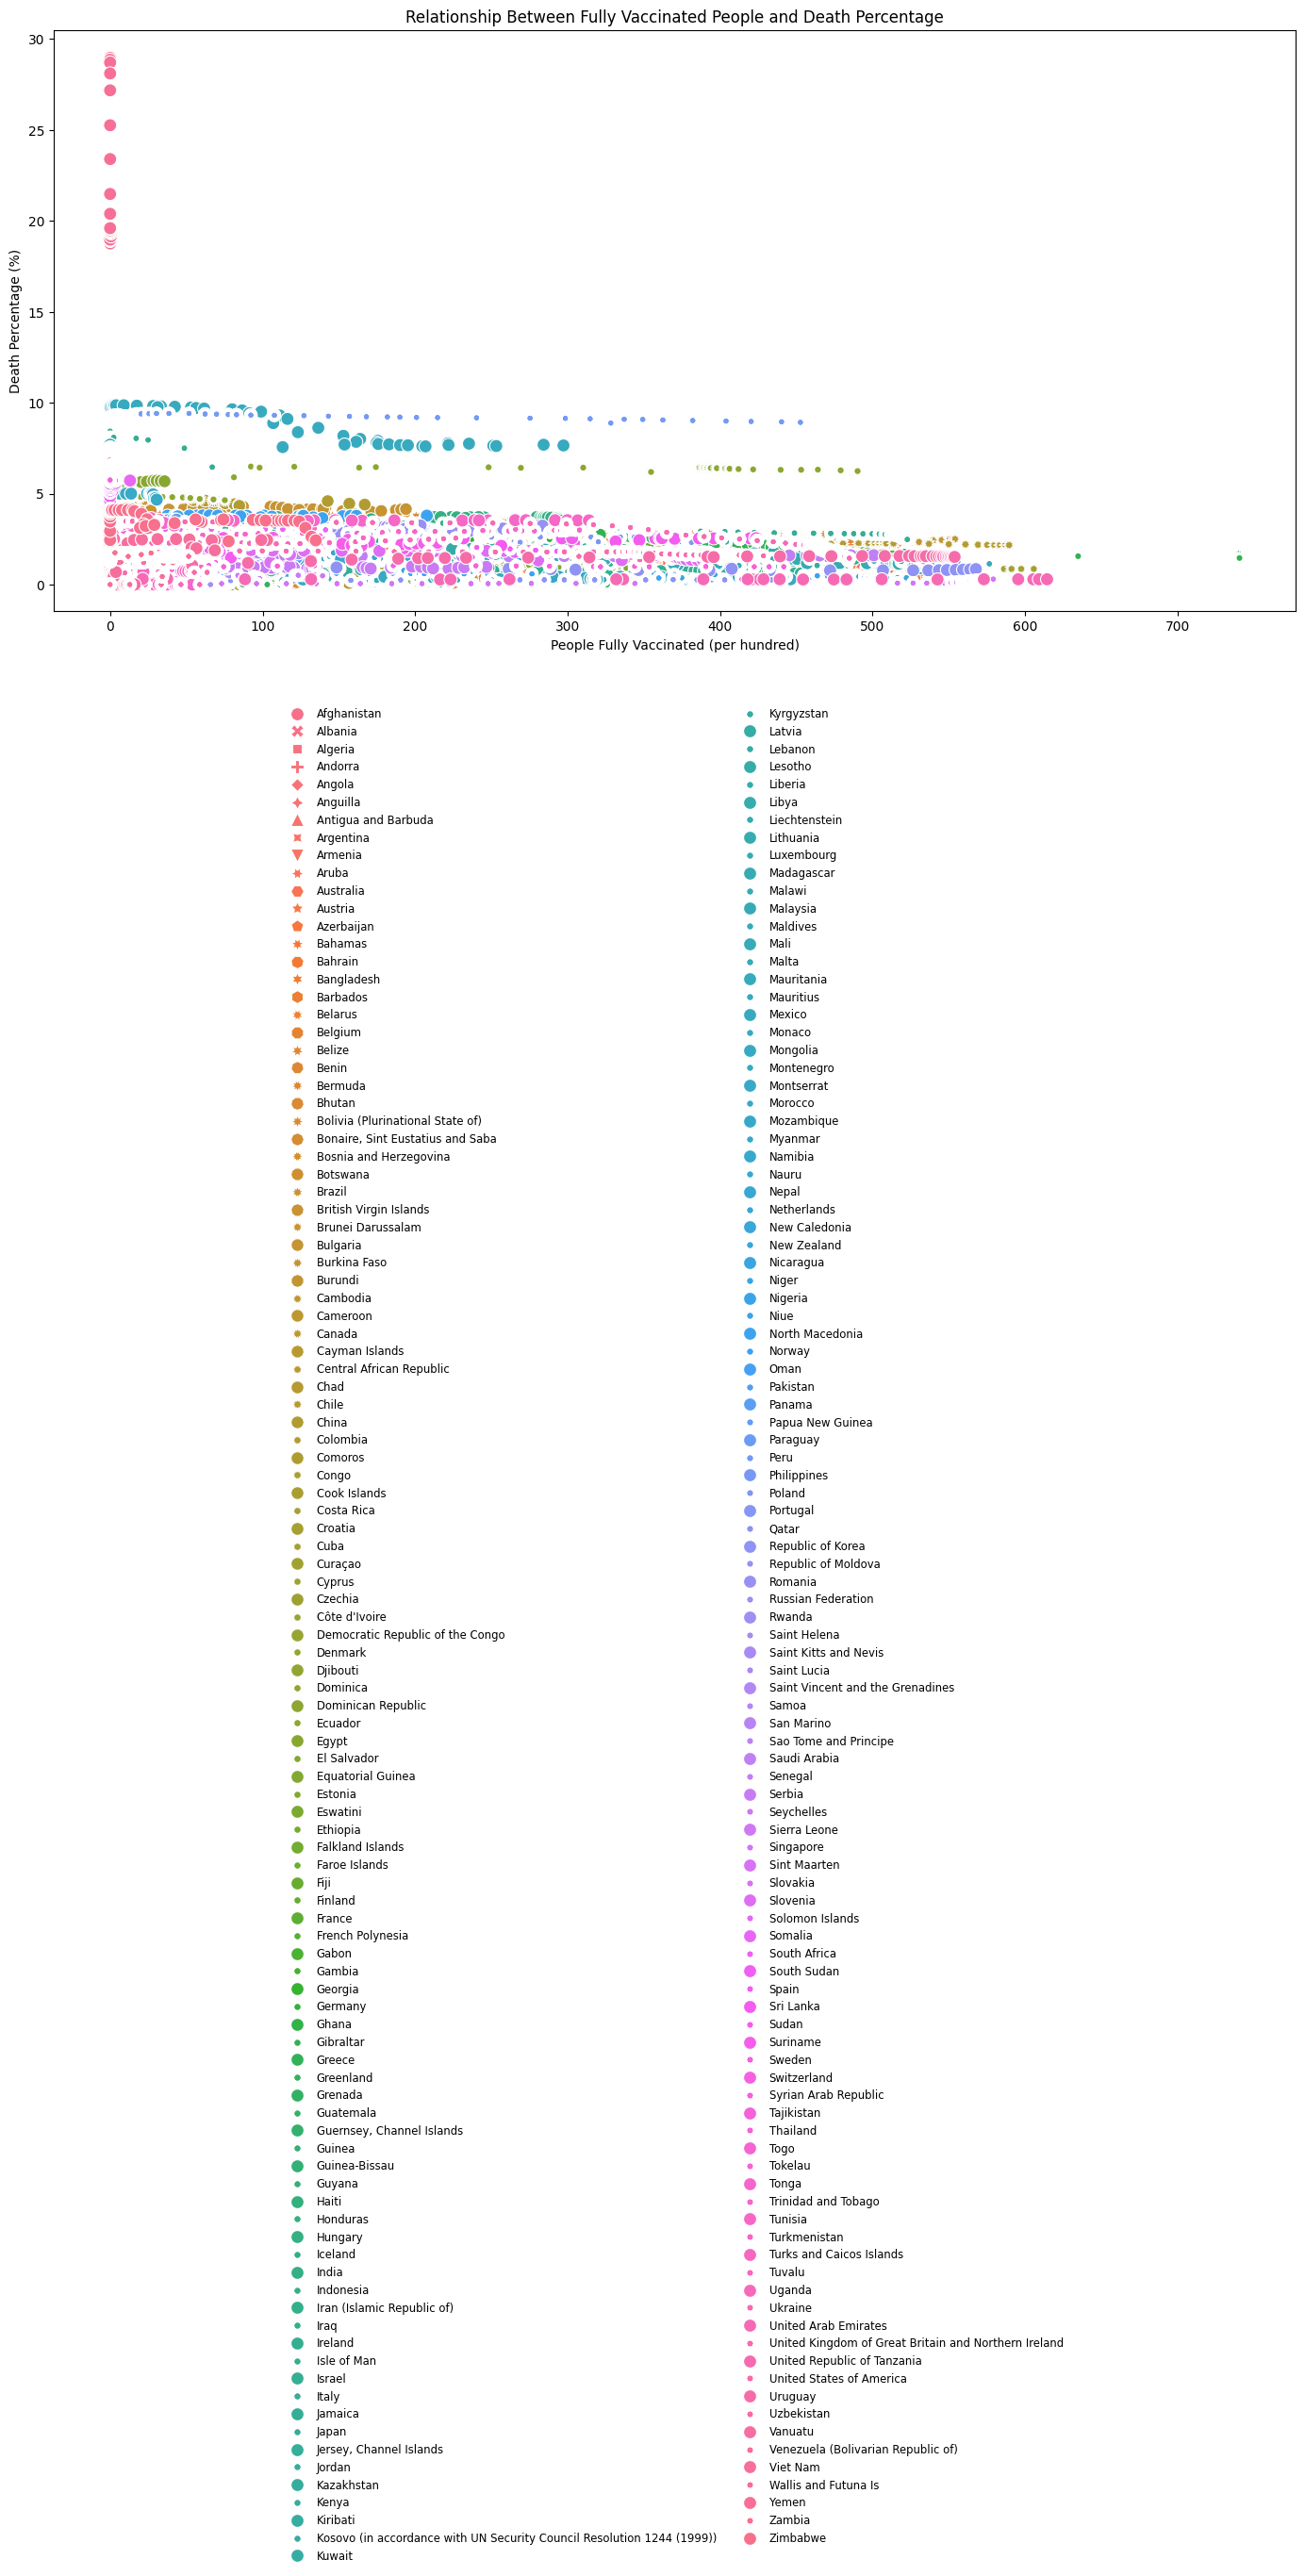

In [73]:
# Let's plot the death percentage as a function of the number of people who were fully vaccinated to understand how the vaccination impacted the deaths

# Set the plot size
plt.figure(figsize=(17, 8))

# Create the scatter plot with a regression line
sns.scatterplot(data=two_vacc_effect, x='People_fully_vaccinated', y='Death_Percentage', hue='Country', style='Country', s=100)

# Formatting the plot
plt.title('Relationship Between Fully Vaccinated People and Death Percentage')
plt.xlabel('People Fully Vaccinated (per hundred)')
plt.ylabel('Death Percentage (%)')

# Customizing the legend to be below the plot
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    fontsize='small',
    frameon=False
)

# Adjust layout to fit everything nicely
plt.tight_layout()
plt.show()

The graph shows the relationship between the death percentage and the number of people who were fully vaccinated in each country. As the number of fully vaccinated individuals increases, we observe a decline in the death percentage. This trend suggests that full vaccination played a key role in reducing fatalities. By enhancing immunity against COVID-19, widespread vaccination efforts appear to have effectively minimized the impact of the virus on mortality rates.

### **4.2. Plotting the Relationship Between Percentage of Booster Shots Taken and the Death Percentage:**

/usr/local/lib/python3.10/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
<ipython-input-60-c0f64d8bee11>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


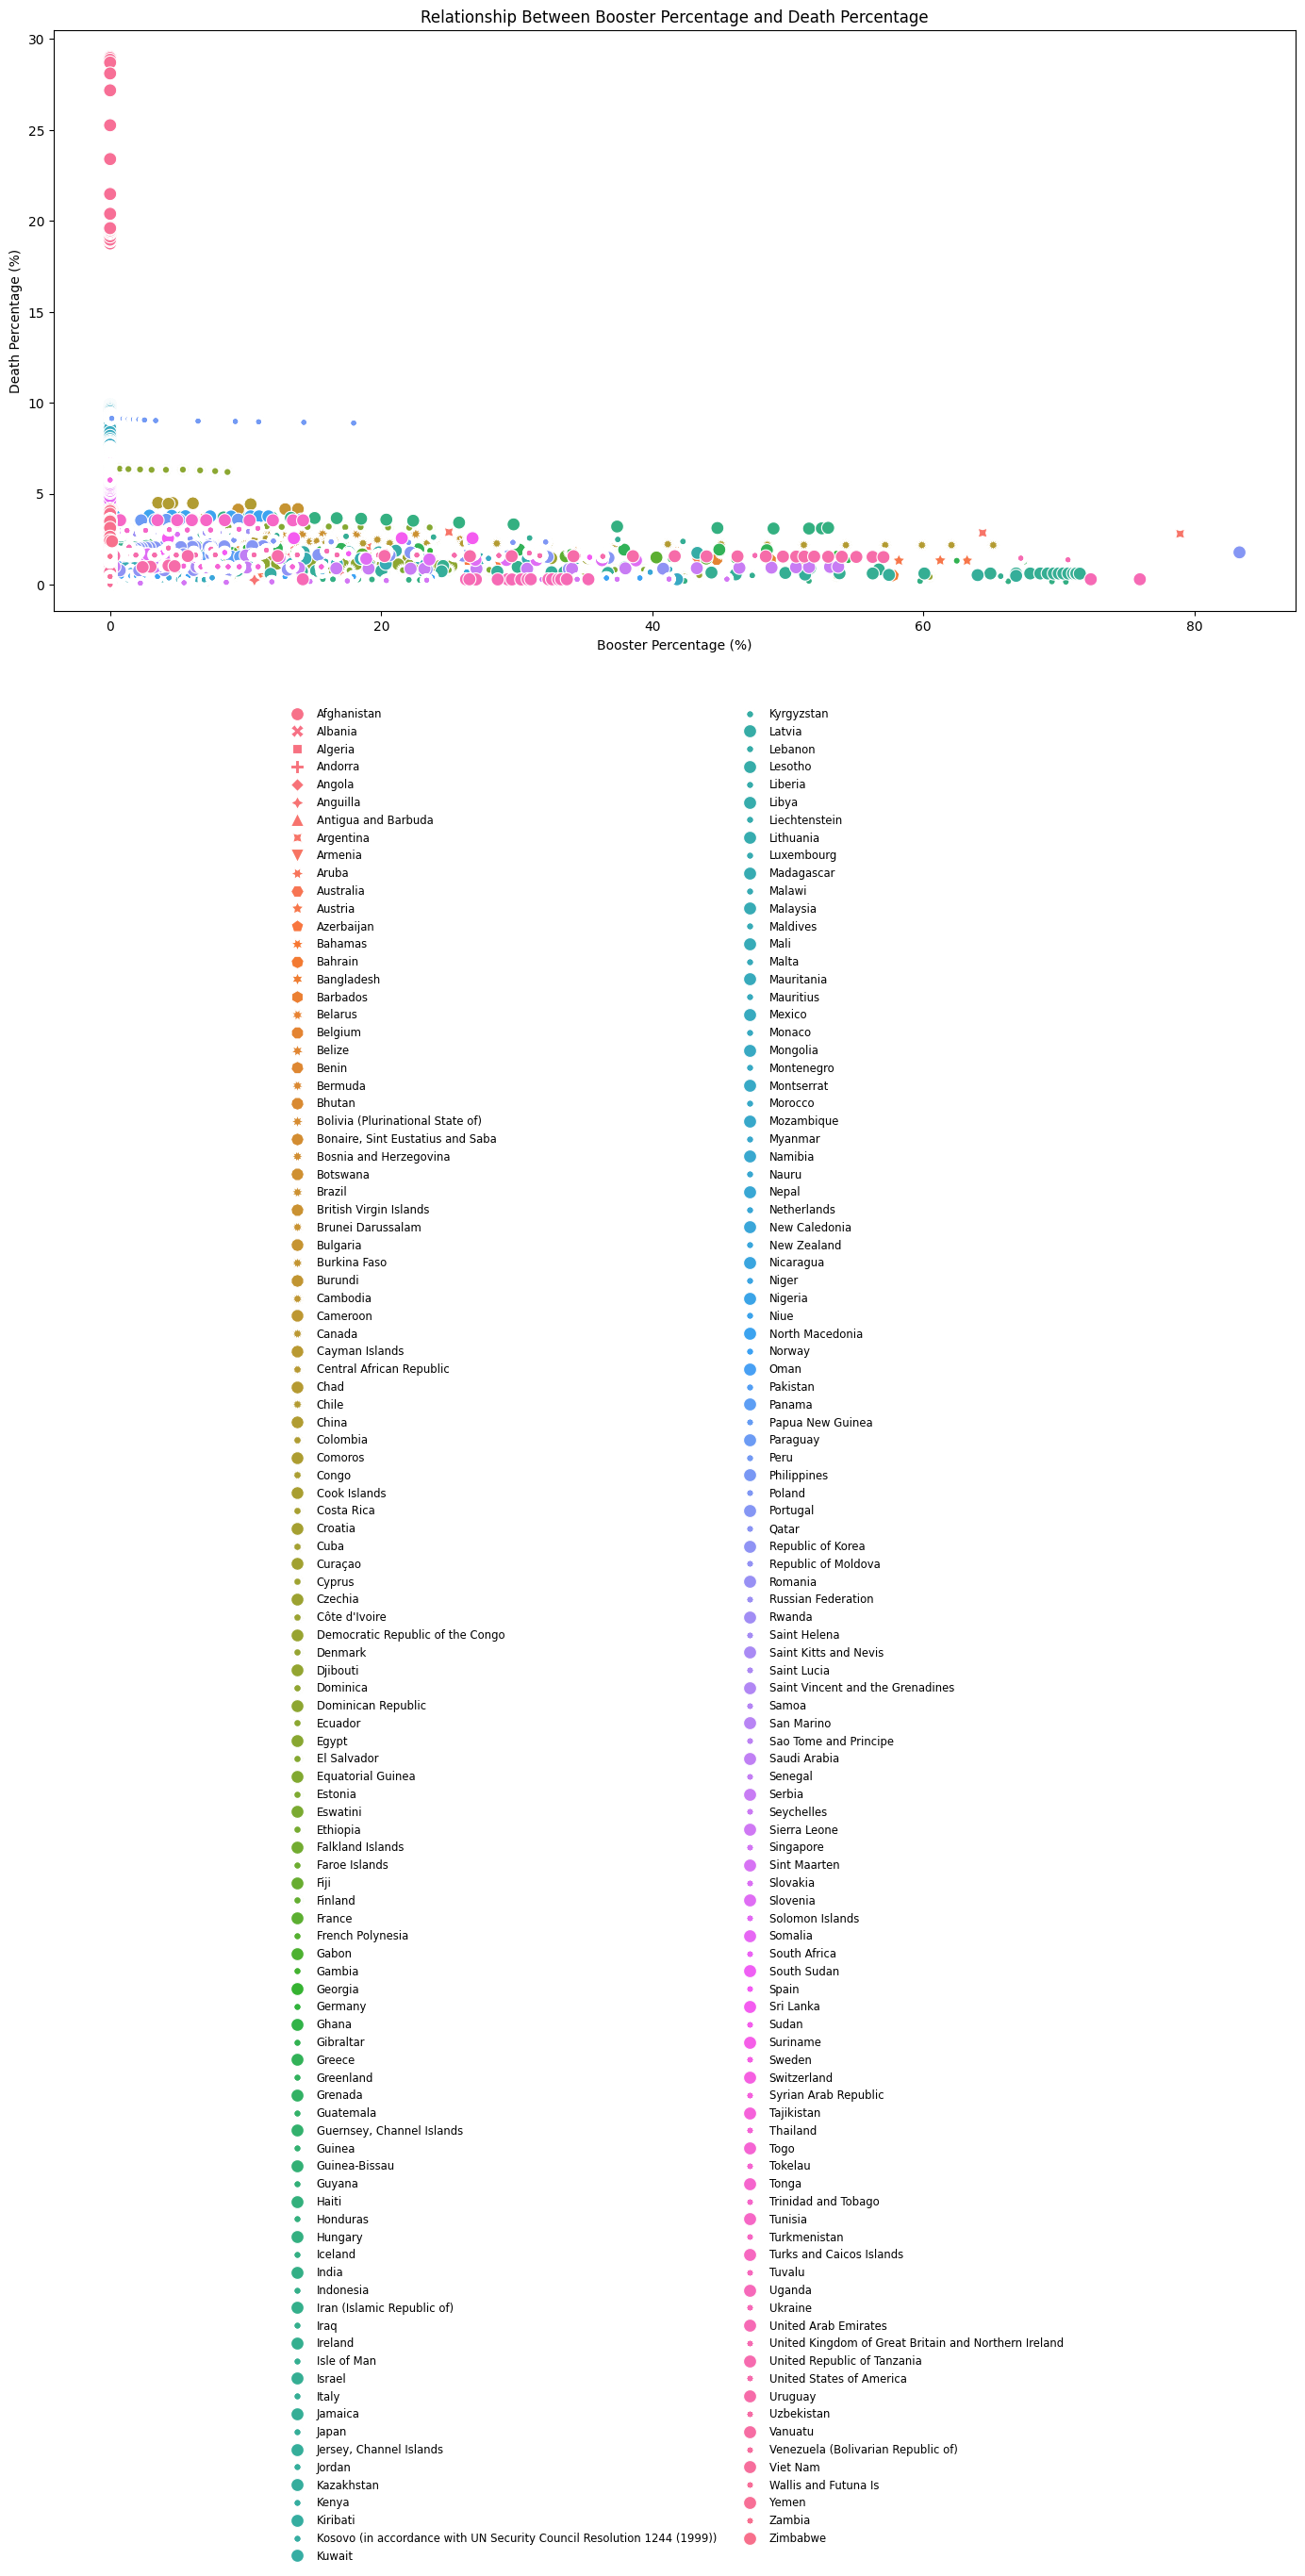

In [60]:
# Let's just quickly visualize our analysis to get a rough idea of whether the booster shots were really helpful or not

# In this plot, we're not aiming to look at which country minimised casualities, but we want to understand if the booster shots had any effect on the severity of the disease

# Create a scatter plot with a regression line
plt.figure(figsize=(17, 8))
sns.scatterplot(data=booster_effect, x='Booster_Percentage', y='Death_Percentage', hue='Country', style='Country', s=100)

# Add trend line
sns.regplot(data=booster_effect, x='Booster_Percentage', y='Death_Percentage', scatter=False, color='gray')

# Formatting
plt.title('Relationship Between Booster Percentage and Death Percentage')
plt.xlabel('Booster Percentage (%)')
plt.ylabel('Death Percentage (%)')
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    fontsize='small',
    frameon=False
)
plt.tight_layout()
plt.show()

The graph reveals a noticeable trend: as the percentage of booster shots administered within a country increases, there is a corresponding decrease in the death percentage. This pattern strongly suggests that booster shots have been effective in reducing fatalities, highlighting their role in mitigating the impact of COVID-19. By boosting immunity, these additional doses appear to contribute significantly to lowering mortality rates.

Examining the slopes of both graphs, we observe a steeper decline in the death percentage following the administration of booster shots compared to just two doses of the vaccine. This suggests that booster shots were more effective in preventing fatalities, further emphasizing their importance in enhancing protection against COVID-19.

Both graphs are exponential decay graphs. Refer to the link below to understand it's mathematical application in this scenario:
("https://thirdspacelearning.com/us/math-resources/topic-guides/ratio-and-proportion/exponential-decay/")

### **4.3. SQL Querying:**

In [80]:
# Query to analyse trends in death percentages over time by country

sq = """SELECT country,
       week,
       death_percentage,
       LAG(death_percentage, 1) OVER (PARTITION BY country ORDER BY week) AS previous_week_death_percentage,
       (death_percentage - LAG(death_percentage, 1) OVER (PARTITION BY country ORDER BY week)) AS weekly_change
FROM death_percentage
ORDER BY country, week;"""

run_query(sq)

Database 'ista322finalproject' already exists.


(['country',
  'week',
  'death_percentage',
  'previous_week_death_percentage',
  'weekly_change'],
 [('Afghanistan', datetime.date(2020, 12, 28), Decimal('4.20'), None, None),
  ('Afghanistan',
   datetime.date(2021, 1, 4),
   Decimal('4.23'),
   Decimal('4.20'),
   Decimal('0.03')),
  ('Afghanistan',
   datetime.date(2021, 1, 11),
   Decimal('4.31'),
   Decimal('4.23'),
   Decimal('0.08')),
  ('Afghanistan',
   datetime.date(2021, 1, 18),
   Decimal('4.34'),
   Decimal('4.31'),
   Decimal('0.03')),
  ('Afghanistan',
   datetime.date(2021, 1, 25),
   Decimal('4.36'),
   Decimal('4.34'),
   Decimal('0.02')),
  ('Afghanistan',
   datetime.date(2021, 2, 1),
   Decimal('4.36'),
   Decimal('4.36'),
   Decimal('0.00')),
  ('Afghanistan',
   datetime.date(2021, 2, 8),
   Decimal('4.37'),
   Decimal('4.36'),
   Decimal('0.01')),
  ('Afghanistan',
   datetime.date(2021, 2, 15),
   Decimal('4.37'),
   Decimal('4.37'),
   Decimal('0.00')),
  ('Afghanistan',
   datetime.date(2021, 2, 22),
   Dec

In [81]:
# Query to see the effectiveness of booster shots in reducing death percentages

sq = """SELECT country,
       AVG(CASE WHEN booster_percentage >= 50 THEN death_percentage END) AS avg_death_percentage_high_boosters,
       AVG(CASE WHEN booster_percentage < 50 THEN death_percentage END) AS avg_death_percentage_low_boosters,
       (AVG(CASE WHEN booster_percentage < 50 THEN death_percentage END) -
        AVG(CASE WHEN booster_percentage >= 50 THEN death_percentage END)) AS reduction_in_death_percentage
FROM booster
GROUP BY country
ORDER BY reduction_in_death_percentage DESC;"""

run_query(sq)

Database 'ista322finalproject' already exists.


(['country',
  'avg_death_percentage_high_boosters',
  'avg_death_percentage_low_boosters',
  'reduction_in_death_percentage'],
 [('Guinea-Bissau', None, Decimal('1.9098113207547170'), None),
  ('Niger', None, Decimal('3.5305660377358491'), None),
  ('Panama', None, Decimal('1.6171698113207547'), None),
  ('Yemen', None, Decimal('21.3696226415094340'), None),
  ('South Sudan', None, Decimal('1.1515094339622642'), None),
  ('Lithuania', None, Decimal('1.5239622641509434'), None),
  ('Bulgaria', None, Decimal('4.1043396226415094'), None),
  ('Turkmenistan', None, Decimal('0E-20'), None),
  ('Croatia', None, Decimal('2.1235849056603774'), None),
  ('Tunisia', None, Decimal('3.4703773584905660'), None),
  ('Sudan', None, Decimal('7.0294339622641509'), None),
  ('Aruba', None, Decimal('0.96679245283018867925'), None),
  ('Mali', None, Decimal('3.6775471698113208'), None),
  ('North Macedonia', None, Decimal('3.6837735849056604'), None),
  ('Morocco', None, Decimal('1.6579245283018868'), Non

In [82]:
# Query to rank countries by reduction in death percentages due to vaccinations

sq = """SELECT country,
       RANK() OVER (ORDER BY
           (AVG(CASE WHEN people_fully_vaccinated >= 50 THEN death_percentage END) -
            AVG(CASE WHEN people_fully_vaccinated < 50 THEN death_percentage END)) DESC
       ) AS rank_by_vaccination_effectiveness,
       AVG(CASE WHEN people_fully_vaccinated >= 50 THEN death_percentage END) AS avg_death_percentage_high_vacc,
       AVG(CASE WHEN people_fully_vaccinated < 50 THEN death_percentage END) AS avg_death_percentage_low_vacc,
       (AVG(CASE WHEN people_fully_vaccinated < 50 THEN death_percentage END) -
        AVG(CASE WHEN people_fully_vaccinated >= 50 THEN death_percentage END)) AS reduction_due_to_vaccination
FROM fully_vaccinated
GROUP BY country
ORDER BY rank_by_vaccination_effectiveness;"""

run_query(sq)

Database 'ista322finalproject' already exists.


(['country',
  'rank_by_vaccination_effectiveness',
  'avg_death_percentage_high_vacc',
  'avg_death_percentage_low_vacc',
  'reduction_due_to_vaccination'],
 [('Sao Tome and Principe', 1, None, Decimal('1.5098113207547170'), None),
  ('Niger', 1, None, Decimal('3.5305660377358491'), None),
  ('Chad', 1, None, Decimal('3.5364150943396226'), None),
  ('Yemen', 1, None, Decimal('21.3696226415094340'), None),
  ('South Sudan', 1, None, Decimal('1.1515094339622642'), None),
  ('Afghanistan', 1, None, Decimal('4.4428301886792453'), None),
  ('Bahamas', 1, None, Decimal('2.2869811320754717'), None),
  ('Turkmenistan', 1, None, Decimal('0E-20'), None),
  ('Egypt', 1, None, Decimal('5.7466037735849057'), None),
  ('Liechtenstein', 1, None, Decimal('1.8001886792452830'), None),
  ('Sudan', 1, None, Decimal('7.0294339622641509'), None),
  ('Namibia', 1, None, Decimal('1.9230188679245283'), None),
  ('Mali', 1, None, Decimal('3.6775471698113208'), None),
  ('United Republic of Tanzania',
   1,
  